# Figure Notebook for "AuroraX, aurorax-api and aurorax-asilib: a user-friendly auroral all-sky imager analysis framework"

In [63]:
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import dates
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import numpy as np
import asilib

print(f'asilib version: {asilib.__version__}')

asilib version: 0.9.0


# Figure 2

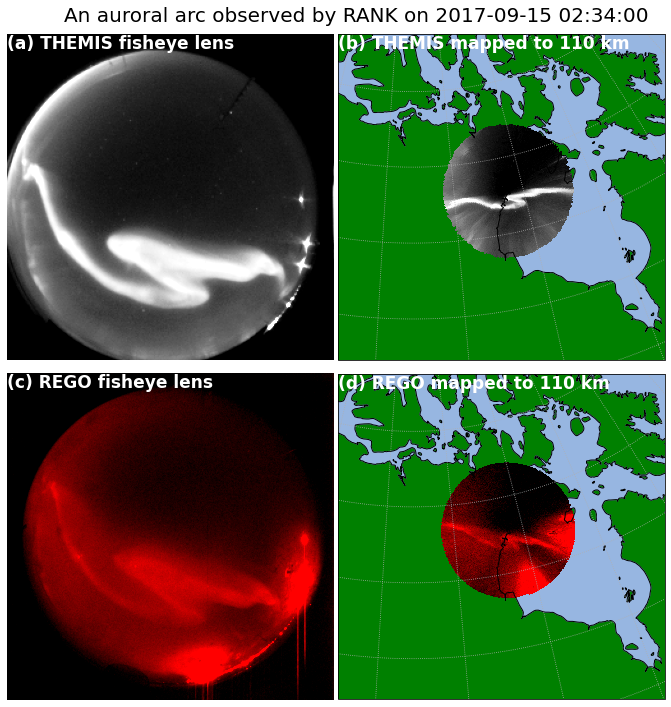

In [55]:
location_code = 'RANK'
time = datetime(2017, 9, 15, 2, 34, 0)
map_alt_km = 110
fontsize=17

plot_extent = [-114, -78, 52, 72]
fig = plt.figure(figsize=(10, 10))
ax = np.zeros((2,2), dtype=object)
projection = ccrs.Orthographic(-106, 61)
ax[0, 0] = fig.add_subplot(2, 2, 1)
ax[0, 1] = fig.add_subplot(2, 2, 2, projection=projection)
ax[1, 0] = fig.add_subplot(2, 2, 3)
ax[1, 1] = fig.add_subplot(2, 2, 4, projection=projection)

ax[0, 0].axis('off')
ax[1, 0].axis('off')

ax[0, 1].add_feature(cfeature.LAND, color='green')
ax[0, 1].add_feature(cfeature.OCEAN)
ax[0, 1].add_feature(cfeature.COASTLINE)
ax[0, 1].gridlines(linestyle=':')
ax[1, 1].add_feature(cfeature.LAND, color='green')
ax[1, 1].add_feature(cfeature.OCEAN)
ax[1, 1].add_feature(cfeature.COASTLINE)
ax[1, 1].gridlines(linestyle=':')

asilib.plot_image('THEMIS', location_code, time, ax=ax[0, 0], label=False)
asilib.plot_image('REGO', location_code, time, ax=ax[1, 0], label=False)
asilib.plot_map('THEMIS', location_code, time, map_alt_km, ax=ax[0, 1], asi_label=False)
asilib.plot_map('REGO', location_code, time, map_alt_km, ax=ax[1, 1], asi_label=False)

ax[0, 1].set_extent(plot_extent, crs=ccrs.PlateCarree())
ax[1, 1].set_extent(plot_extent, crs=ccrs.PlateCarree())

ax[0, 0].text(0, 1, f'(a) THEMIS fisheye lens', va='top', transform=ax[0,0].transAxes, 
    color='white', fontsize=fontsize, weight='bold')
ax[0, 1].text(0, 1, f'(b) THEMIS mapped to {map_alt_km} km', va='top', transform=ax[0,1].transAxes, 
    color='white', fontsize=fontsize, weight='bold')
ax[1, 0].text(0, 1, f'(c) REGO fisheye lens', va='top', transform=ax[1,0].transAxes, 
    color='white', fontsize=fontsize, weight='bold')
ax[1, 1].text(0, 1, f'(d) REGO mapped to {map_alt_km} km', va='top', transform=ax[1,1].transAxes, 
    color='white', fontsize=fontsize, weight='bold')

plt.suptitle(f'An auroral arc observed by {location_code} on {time}', fontsize=20)
plt.tight_layout()

In [44]:
themis_skymap = asilib.load_skymap('THEMIS', location_code, time)
rego_skymap = asilib.load_skymap('REGO', location_code, time)

In [45]:
themis_skymap['SKYMAP_PATH']

PosixPath('/media/mike/2D6742F55A2E0A82/asilib-data/themis/skymap/rank/themis_skymap_rank_20150825_vXX.sav')

In [46]:
rego_skymap['SKYMAP_PATH']

PosixPath('/media/mike/2D6742F55A2E0A82/asilib-data/rego/skymap/rank/rego_skymap_rank_20170317_vXX.sav')

# Figure 3

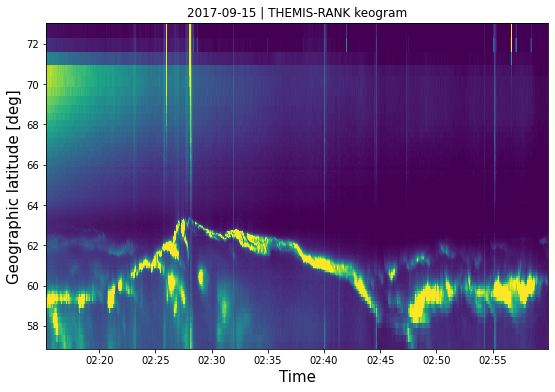

In [69]:
fig, ax = plt.subplots(figsize=(9, 6))
time_range = (datetime(2017, 9, 15, 2, 0, 0), datetime(2017, 9, 15, 3, 0, 0))
asilib.plot_keogram('THEMIS', location_code, time_range, map_alt=map_alt_km, ax=ax)
# ax.set_ylim(None, 66)
ax.set_xlabel('Time', fontsize=15)
ax.set_ylabel('Geographic latitude [deg]', fontsize=15)

fmtr = dates.DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(fmtr)